# Error in keras 

conda install -c anaconda h5py

* WRITE THIS WAY 
from tensorflow.keras.models import Sequential


In [1]:
# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Convolution2D # 1 
from keras.layers import MaxPooling2D #2
from keras.layers import Flatten #3
from keras.layers import Dense #4 FULLY CONNECTED LAYER hidden l

In [2]:
# Initialising the CNN
classifier = Sequential()

# Step 1 - Convolution
classifier.add(Convolution2D(32, 3, 3, input_shape = (64, 64, 3), activation = 'relu'))

# Step 2 - Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2))) # AVERAGE = FILTER HIGHER NUMBER 

# Step 3 -  convolutional layer
# Adding a second convolutional layer
classifier.add(Convolution2D(32, 3, 3, activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Step 4 - Flattening
classifier.add(Flatten())  #one dimensional

# Step 4 - Full connection
classifier.add(Dense(units = 128, activation = 'relu'))  # hidden layer 1
classifier.add(Dense(units = 64, activation = 'relu')) # hidden layer 2

classifier.add(Dense(units = 1, activation = 'sigmoid')) #output Layer 


In [3]:
# Compiling the CNN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [4]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 21, 21, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 10, 10, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 3, 3, 32)          9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 1, 1, 32)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 32)                0         
                                                                 
 dense (Dense)               (None, 128)               4

In [5]:
# Part 2 - Fitting the CNN to the images

from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255)  #black=255 whote=0

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory(r'C:\Users\dell\OneDrive\Desktop\python\dataset\training_set',
                                                 target_size = (64, 64), # image size reduce
                                                 batch_size = 32, # group
                                                 class_mode='binary') 

test_set = test_datagen.flow_from_directory(r'C:\Users\dell\OneDrive\Desktop\python\dataset\test_set',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode='binary') 

Found 8100 images belonging to 4 classes.
Found 2040 images belonging to 4 classes.


In [6]:
training_set.class_indices

{'addidas': 0, 'cats': 1, 'dogs': 2, 'nike': 3}

In [7]:
100/32

3.125

In [8]:
import warnings 
warnings.filterwarnings("ignore")

In [9]:
result=classifier.fit(training_set,
                         epochs=50, #repeat
                         validation_data = test_set)

Epoch 1/50
254/254 [==============================] - 76s 294ms/step - loss: -678821.5625 - accuracy: 0.4926 - val_loss: -4871271.0000 - val_accuracy: 0.4902
Epoch 2/50
254/254 [==============================] - 43s 170ms/step - loss: -83314944.0000 - accuracy: 0.4938 - val_loss: -273153632.0000 - val_accuracy: 0.4902
Epoch 3/50
254/254 [==============================] - 43s 168ms/step - loss: -1037680704.0000 - accuracy: 0.4938 - val_loss: -2320511744.0000 - val_accuracy: 0.4902
Epoch 4/50
254/254 [==============================] - 44s 174ms/step - loss: -5400516608.0000 - accuracy: 0.4938 - val_loss: -9777117184.0000 - val_accuracy: 0.4902
Epoch 5/50
254/254 [==============================] - 43s 171ms/step - loss: -18044340224.0000 - accuracy: 0.4938 - val_loss: -28562014208.0000 - val_accuracy: 0.4902
Epoch 6/50
254/254 [==============================] - 39s 154ms/step - loss: -45805895680.0000 - accuracy: 0.4938 - val_loss: -66566782976.0000 - val_accuracy: 0.4902
Epoch 7/50
254/2

254/254 [==============================] - 45s 179ms/step - loss: -279054024441856.0000 - accuracy: 0.4938 - val_loss: -288263440957440.0000 - val_accuracy: 0.4902
Epoch 49/50
254/254 [==============================] - 46s 180ms/step - loss: -302453878685696.0000 - accuracy: 0.4938 - val_loss: -312239122808832.0000 - val_accuracy: 0.4902
Epoch 50/50
254/254 [==============================] - 45s 179ms/step - loss: -327333684707328.0000 - accuracy: 0.4938 - val_loss: -337669422841856.0000 - val_accuracy: 0.4902


In [10]:
classifier.save('addi_nike_classifier.h5')

!pip install opencv-python-headless==4.5.2.52

In [11]:
from  keras.models import load_model
from keras_preprocessing import image
import numpy as np
import cv2  # pip install opencv-python
import matplotlib.pyplot as plt 
%matplotlib inline

In [12]:
model=load_model("addi_nike_classifier.h5")

In [13]:
def model_output (path):
    raw_img = image.load_img(path,target_size=(64,64))
    raw_img = image.img_to_array(raw_img)
    raw_img = np.expand_dims(raw_img, axis=0)
    raw_img = raw_img/255
    prediction= model.predict(raw_img)[0][0]
    Probability = model.predict(raw_img)[0][0]
    #prediction = (model.predict(raw_img) > 0.5).astype("int32  # new tensorflow version
    plt.imshow(cv2.imread(path))
    print('Probability',Probability)
    if prediction:
        print("its a Nike")
    else:
        print("its a Adidas")

In [14]:
import os
os.getcwd()

'C:\\Users\\dell\\Downloads'

1/1 [==============================] - 0s 33ms/step
Probability 1.0
its a Nike


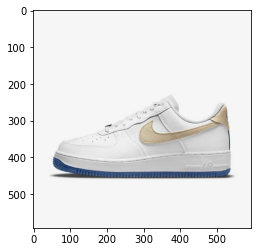

In [15]:
model_output("Nike_demo.png")

1/1 [==============================] - 0s 25ms/step
Probability 1.0
its a Nike


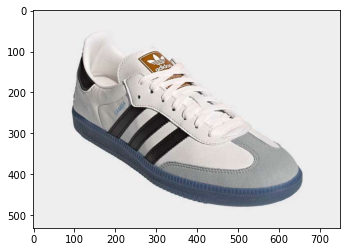

In [16]:
model_output("addi_demo2.png")

1/1 [==============================] - 0s 18ms/step
Probability 1.0
its a Nike


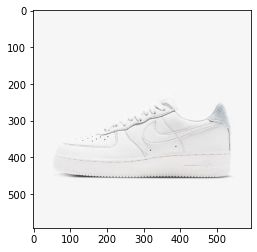

In [19]:
model_output("image.png")

1/1 [==============================] - 0s 24ms/step
Probability 1.0
its a Nike


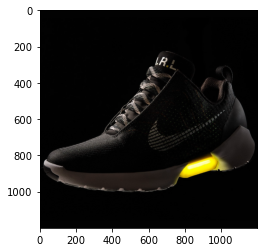

In [20]:
model_output("image1.jpg")

# Finish